In [1]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gymnasium

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gymnasium[classic-control]

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

C:\Users\Matin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


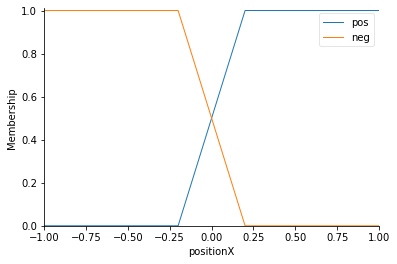

In [5]:
positionX = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'positionX')

positionX['pos'] = fuzz.trapmf(positionX.universe, [-0.2, 0.2, 1.01, 1.01])
positionX['neg'] = fuzz.trapmf(positionX.universe, [-1, -1, -0.2, 0.2])

positionX.view()

C:\Users\Matin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


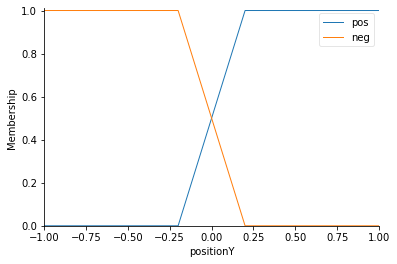

In [6]:
positionY = ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'positionY')

positionY['pos'] = fuzz.trapmf(positionY.universe, [-0.2, 0.2, 1.01, 1.01])
positionY['neg'] = fuzz.trapmf(positionY.universe, [-1, -1, -0.2, 0.2])

positionY.view()

C:\Users\Matin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


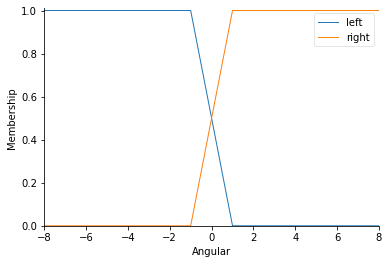

In [7]:
Angular = ctrl.Antecedent(np.arange(-8, 8.01, 0.01), 'Angular')

Angular['left'] = fuzz.trapmf(Angular.universe, [-8, -8, -1, 1])
Angular['right'] = fuzz.trapmf(Angular.universe, [-1, 1, 8.01, 8.01])

Angular.view()

C:\Users\Matin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


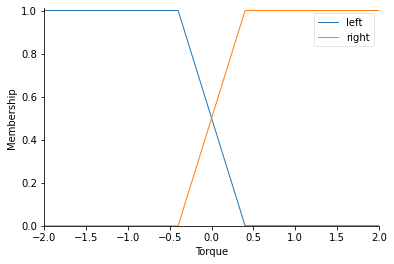

In [8]:
Torque = ctrl.Consequent(np.arange(-2, 2.01, 0.01), 'Torque')

Torque['left'] = fuzz.trapmf(Torque.universe, [-2, -2, -0.4, 0.4])
Torque['right'] = fuzz.trapmf(Torque.universe, [-0.4, 0.4, 2.01, 2.01])

Torque.view()

In [9]:
rule1 = ctrl.Rule(positionX['neg'] & Angular['left'], Torque['left'])
rule2 = ctrl.Rule(positionX['neg'] & Angular['right'], Torque['right'])
rule3 = ctrl.Rule(positionX['pos'] & Angular['left'], Torque['right'])
rule4 = ctrl.Rule(positionX['pos'] & Angular['right'], Torque['left'])


In [10]:
controller = ctrl.ControlSystem([rule1,rule2,rule3,rule4])
simulator = ctrl.ControlSystemSimulation(controller)

In [11]:
env = gym.make("Pendulum-v1", render_mode="human")

rewardList = []
observation, _ = env.reset()
for i in range(500):
    
    simulator.input['positionX'] = observation[0]
    simulator.input['Angular'] = observation[2]
    simulator.compute()
    decision = simulator.output['Torque']
    
    observation, reward, terminated, _, _ = env.step([decision])
    rewardList.append(reward)
    
    if observation[0] > 0.99 and abs(observation[2]) < 1:
        terminated = True
    
    env.render()
    
    if terminated:
        print(f'You Win in {i} iteration!')
        break

env.close()

You Win in 105 iteration!


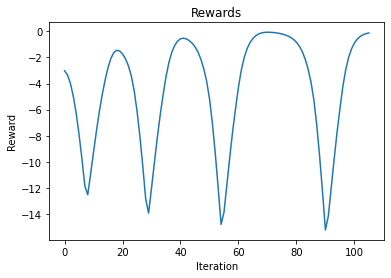

In [13]:
plt.plot(rewardList)
plt.title('Rewards')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.show()